# Creating the train_set csv
saves currently into downloads

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [4]:
# CMA ##
CMA = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\CMA_train_set2.csv')


# CMA_s ##
CMA_s = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\train_set_CMA_correct_subject2.csv')

# unique_questions ##
unique_questions = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\unique_questions2.csv')

# day_count_train_set2 ##
day_count_train_set2 = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\day_count_train_set2.csv')

# train_set ##
train_set = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\train_set_draft_1.csv')

# question
question = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\dataset\\question_metadata.csv')


# need to change DateAnswered and DateOfBirth columns to datetime format
train_set['DateAnswered'] = pd.to_datetime(train_set['DateAnswered'], format='%Y-%m-%d %H:%M:%S.%f')
train_set['DateOfBirth'] = pd.to_datetime(train_set['DateOfBirth'], format='%Y-%m-%d %H:%M:%S.%f')

# change SubjectId to list format
question['SubjectId'] = question['SubjectId'].str.strip('[]').str.split(',')

# Merge datasets
train_set = train_set.merge(CMA[['AnswerId', 'CMA']], how='inner', on=['AnswerId'])
train_set = train_set.merge(CMA_s[['AnswerId', 'CMA_correct_subject']], how='inner', on=['AnswerId'])
train_set = train_set.merge(unique_questions[['QuestionId', 'total_q_answered']], how='inner', on=['QuestionId'])
train_set = train_set.merge(day_count_train_set2[['AnswerId', 'holiday', 'unique_day', 'yr2']], how='inner', on=['AnswerId'])
train_set = train_set.merge(question[['QuestionId', 'SubjectId']], how='inner', on=['QuestionId'])

train_set.to_csv(r'C:\\Users\\kfps86\\Downloads\\train_set.csv')
train_set.head()

,Unnamed: 0,QuestionId,UserId,AnswerId,IsCorrect,DateAnswered,Confidence,Gender,DateOfBirth,PremiumPupil,...,49,692,71,CMA,CMA_correct_subject,total_q_answered,holiday,unique_day,yr2,SubjectId
0,0,2453,88059,11540829,1,2019-04-02 21:15:00,75.0,0,2005-08-01,0.0,...,0,0,1,0.805369,0.625000,870,0,36,0,"[3, 71, 100, 189]"
1,0,2453,88059,11540829,1,2019-04-02 21:15:00,75.0,0,2005-08-01,0.0,...,0,0,1,0.806667,0.625000,870,0,36,0,"[3, 71, 100, 189]"
2,26183,2453,49396,10903750,0,2019-12-02 23:02:00,75.0,2,2005-08-01,0.0,...,0,0,1,0.369231,0.369565,870,0,7,1,"[3, 71, 100, 189]"
3,80972,2453,78485,18583255,1,2019-05-01 15:35:00,75.0,2,2005-08-01,0.0,...,0,0,1,0.610526,0.363636,870,0,20,0,"[3, 71, 100, 189]"
4,80972,2453,78485,18583255,1,2019-05-01 15:35:00,75.0,2,2005-08-01,0.0,...,0,0,1,0.608392,0.363636,870,0,20,0,"[3, 71, 100, 189]"


In [5]:
del CMA
del CMA_s
del unique_questions
del day_count_train_set2
del question

# Add in Additional columns
columns to be addded
* add in subjects categories top 20 influential

* time since last answered question
* weekend/weekday
* time (time is_morning, is_evening etc) 
* term
* age when answered
* add those extra columns

In [7]:
train_set.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
train_set['age'] = train_set['DateAnswered'] - train_set['DateOfBirth'] 

In [10]:
train_set['total_answered'] = train_set.groupby(['UserId'])['IsCorrect'].transform('count')
train_set['total_correct'] = train_set.groupby(['UserId'])['IsCorrect'].transform('sum')
train_set['prop_correct'] = train_set['total_correct'] / train_set['total_answered']

In [27]:
# set which term it is (include subsequent holidays in the term)
train_set['term'] = 6

train_set.loc[((train_set['DateAnswered'] >= '2018-09-04') & (train_set['DateAnswered'] < '2018-10-29')) |
              ((train_set['DateAnswered'] >= '2019-09-02') & (train_set['DateAnswered'] < '2019-10-28')),
              'term'] = 1
              
train_set.loc[((train_set['DateAnswered'] >= '2018-10-29') & (train_set['DateAnswered'] < '2019-01-03')) |
              ((train_set['DateAnswered'] >= '2019-10-28') & (train_set['DateAnswered'] < '2020-01-06')),
              'term'] = 2
              
train_set.loc[((train_set['DateAnswered'] >= '2019-01-03') & (train_set['DateAnswered'] < '2019-02-25')) |
              ((train_set['DateAnswered'] >= '2020-01-06') & (train_set['DateAnswered'] < '2020-02-24')),
              'term'] = 3
              
train_set.loc[((train_set['DateAnswered'] >= '2019-02-25') & (train_set['DateAnswered'] < '2019-04-23')) |
              ((train_set['DateAnswered'] >= '2020-02-24') & (train_set['DateAnswered'] < '2020-04-20')),
              'term'] = 4
              
train_set.loc[((train_set['DateAnswered'] >= '2019-04-23') & (train_set['DateAnswered'] < '2019-06-03')) |
              ((train_set['DateAnswered'] >= '2020-04-20') & (train_set['DateAnswered'] < '2020-06-01')),
              'term'] = 5
              
# train_set.loc[((train_set['DateAnswered'] >= '2019-06-03') & (train_set['DateAnswered'] < '2019-09-02')) |
#               ((train_set['DateAnswered'] >= '2020-06-01')),
#               'term'] = 6
            
             
# train_set.loc[((train_set['DateAnswered'] > '2018-09-03') & (train_set['DateAnswered'] < '2018-10-20')) |
#               ((train_set['DateAnswered'] > '2018-10-28') & (train_set['DateAnswered'] < '2018-12-20')) |
#               ((train_set['DateAnswered'] > '2019-01-02') & (train_set['DateAnswered'] < '2019-02-16')) |
#               ((train_set['DateAnswered'] > '2019-02-24') & (train_set['DateAnswered'] < '2019-04-06')) |
#               ((train_set['DateAnswered'] > '2019-04-22') & (train_set['DateAnswered'] < '2019-05-25')) |
#               ((train_set['DateAnswered'] > '2019-06-02') & (train_set['DateAnswered'] < '2019-07-25')) |

#               ((train_set['DateAnswered'] > '2019-09-01') & (train_set['DateAnswered'] < '2019-10-19')) |
#               ((train_set['DateAnswered'] > '2019-10-27') & (train_set['DateAnswered'] < '2019-12-20')) |
#               ((train_set['DateAnswered'] > '2020-01-05') & (train_set['DateAnswered'] < '2020-02-15')) |
#               ((train_set['DateAnswered'] > '2020-02-23') & (train_set['DateAnswered'] < '2020-04-03')) |
#               ((train_set['DateAnswered'] > '2020-04-19') & (train_set['DateAnswered'] < '2020-05-23')) |
#               ((train_set['DateAnswered'] > '2020-05-31') & (train_set['DateAnswered'] < '2020-07-23')) 
#               ,'holiday'] = 0

In [26]:
# set the time of day
train_set['is_morning'] = 0
train_set.loc[(train_set['DateAnswered'].dt.strftime("%H:%M:%S") >= '08:00:00') &
              (train_set['DateAnswered'].dt.strftime("%H:%M:%S") < '12:00:00')
               , 'is_morning'] = 1

train_set['is_afternoon'] = 0
train_set.loc[(train_set['DateAnswered'].dt.strftime("%H:%M:%S") >= '12:00:00') &
              (train_set['DateAnswered'].dt.strftime("%H:%M:%S") < '16:00:00')
               , 'is_afternoon'] = 1

train_set['is_evening'] = 0
train_set.loc[(train_set['DateAnswered'].dt.strftime("%H:%M:%S") >= '16:00:00') &
              (train_set['DateAnswered'].dt.strftime("%H:%M:%S") < '20:00:00')
               , 'is_evening'] = 1

train_set['is_night'] = 0
train_set.loc[((train_set['DateAnswered'].dt.strftime("%H:%M:%S") >= '20:00:00') &
              (train_set['DateAnswered'].dt.strftime("%H:%M:%S") <= '23:59:59')) |
              (train_set['DateAnswered'].dt.strftime("%H:%M:%S") < '08:00:00')
               , 'is_night'] = 1

In [28]:
train_set.head()

,QuestionId,UserId,AnswerId,IsCorrect,DateAnswered,Confidence,Gender,DateOfBirth,PremiumPupil,DateOfBirthImputed,...,SubjectId,age,total_answered,total_correct,prop_correct,is_morning,is_afternoon,is_evening,is_night,term
0,2453,88059,11540829,1,2019-04-02 21:15:00,75.0,0,2005-08-01,0.0,1,...,"[3, 71, 100, 189]",4992 days 21:15:00,335,260,0.776119,0,0,0,1,4
1,2453,88059,11540829,1,2019-04-02 21:15:00,75.0,0,2005-08-01,0.0,1,...,"[3, 71, 100, 189]",4992 days 21:15:00,335,260,0.776119,0,0,0,1,4
2,2453,49396,10903750,0,2019-12-02 23:02:00,75.0,2,2005-08-01,0.0,1,...,"[3, 71, 100, 189]",5236 days 23:02:00,251,104,0.414343,0,0,0,1,2
3,2453,78485,18583255,1,2019-05-01 15:35:00,75.0,2,2005-08-01,0.0,1,...,"[3, 71, 100, 189]",5021 days 15:35:00,488,295,0.604508,0,1,0,0,5
4,2453,78485,18583255,1,2019-05-01 15:35:00,75.0,2,2005-08-01,0.0,1,...,"[3, 71, 100, 189]",5021 days 15:35:00,488,295,0.604508,0,1,0,0,5


In [30]:
# set whether a weekend or not
train_set['is_weekend'] = 0
train_set.loc[train_set['DateAnswered'].dt.dayofweek > 4, 'is_weekend'] = 1

In [31]:
train_set.head()

,QuestionId,UserId,AnswerId,IsCorrect,DateAnswered,Confidence,Gender,DateOfBirth,PremiumPupil,DateOfBirthImputed,...,age,total_answered,total_correct,prop_correct,is_morning,is_afternoon,is_evening,is_night,term,is_weekend
0,2453,88059,11540829,1,2019-04-02 21:15:00,75.0,0,2005-08-01,0.0,1,...,4992 days 21:15:00,335,260,0.776119,0,0,0,1,4,0
1,2453,88059,11540829,1,2019-04-02 21:15:00,75.0,0,2005-08-01,0.0,1,...,4992 days 21:15:00,335,260,0.776119,0,0,0,1,4,0
2,2453,49396,10903750,0,2019-12-02 23:02:00,75.0,2,2005-08-01,0.0,1,...,5236 days 23:02:00,251,104,0.414343,0,0,0,1,2,0
3,2453,78485,18583255,1,2019-05-01 15:35:00,75.0,2,2005-08-01,0.0,1,...,5021 days 15:35:00,488,295,0.604508,0,1,0,0,5,0
4,2453,78485,18583255,1,2019-05-01 15:35:00,75.0,2,2005-08-01,0.0,1,...,5021 days 15:35:00,488,295,0.604508,0,1,0,0,5,0


In [41]:
# time since last answered question
train_set.sort_values(['UserId', 'DateAnswered'], inplace=True)
train_set['last_answered'] = train_set['DateAnswered'] - datetime.datetime.strptime('2018-09-01 00:00:00', '%Y-%m-%d %H:%M:%S')
train_set['repeat'] = (train_set['UserId']==train_set['UserId'].shift(1))
train_set.loc[train_set['repeat'] == True, 'last_answered'] = train_set['DateAnswered'].diff() 


In [56]:
# change columns to floats so can be analysed by the algo
train_set['age'] = train_set['age'].dt.total_seconds()/60/60/24/365.25
train_set['last_answered'] = train_set['last_answered'].dt.total_seconds()/60/60/24

In [65]:
# read in question
question = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\dataset\\question_metadata.csv')
question.head()

,QuestionId,SubjectId
0,13090,"[3, 32, 71, 77, 141, 185, 186, 214]"
1,1855,"[3, 71, 75, 86, 178]"
2,10423,"[3, 32, 38, 239]"
3,2290,"[3, 32, 33, 144]"
4,12785,"[3, 32, 33, 144]"


In [67]:
question['SubjectId'] = question['SubjectId'].str.strip('[]').str.split(',')

In [68]:
from sklearn.preprocessing import MultiLabelBinarizer

# https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list
# create a one hot encoding column for each category
# uses up a lot of RAM though
mlb = MultiLabelBinarizer(sparse_output=True)

question = question.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(question.pop('SubjectId')),
                index=question.index,
                columns=mlb.classes_))
question.head()

,QuestionId,100,101,102,103,104,105,1059,106,107,...,91,92,93,94,95,96,97,98,99,3
0,13090,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1855,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,10423,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2290,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,12785,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
# question = question[['QuestionId', ' 144', ' 32', ' 202', ' 49', ' 203',
#                     ' 204', ' 54', ' 71', ' 100', ' 55', ' 260', ' 58',
#                     ' 62', ' 1647', ' 200', ' 278', ' 70', ' 36', ' 184',
#                     ' 34']]
# question.head()

,QuestionId,144,32,202,49,203,204,54,71,100,...,260,58,62,1647,200,278,70,36,184,34
0,13090,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1855,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,10423,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2290,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12785,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
train_set = train_set.merge(question[['QuestionId', ' 144', ' 32', ' 202', ' 49', ' 203',
                    ' 204', ' 54', ' 71', ' 100', ' 55', ' 260', ' 58',
                    ' 62', ' 1647', ' 200', ' 278', ' 70', ' 36', ' 184',
                    ' 34']], how='inner', on='QuestionId')

In [73]:
corr = train_set.corr()

<AxesSubplot:>

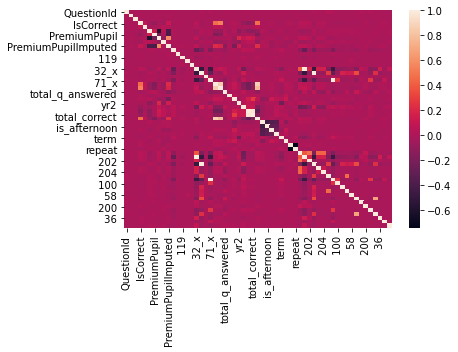

In [74]:
sns.heatmap(corr)

In [75]:
corr['IsCorrect'].abs().sort_values(ascending=False)

IsCorrect              1.000000
CMA_correct_subject    0.541750
prop_correct           0.473670
CMA                    0.466630
total_answered         0.139254
PremiumPupilImputed    0.116341
PremiumPupil           0.084266
total_correct          0.078544
age                    0.077173
Confidence             0.076135
 144                   0.051196
 32_x                  0.049177
 32_y                  0.049177
ConfidenceImputed      0.045658
total_q_answered       0.038138
 49_y                  0.037761
 49_x                  0.037761
Gender                 0.037701
 202                   0.037236
unique_day             0.036977
last_answered          0.026992
 204                   0.025092
 203                   0.023298
 55                    0.022649
repeat                 0.022149
term                   0.021818
 100                   0.021232
 200                   0.019718
is_weekend             0.019712
 54                    0.019057
 58                    0.019033
 184    

In [76]:
len(corr['IsCorrect'])

57

In [77]:
train_set.head()

,QuestionId,UserId,AnswerId,IsCorrect,DateAnswered,Confidence,Gender,DateOfBirth,PremiumPupil,DateOfBirthImputed,...,260,58,62,1647,200,278,70,36,184,34
0,26878,0,8532998,1,2018-09-07 16:54:00,75.0,2,2004-04-01,0.0,0,...,0,0,1,0,0,0,1,0,0,0
1,26878,38,11909589,0,2019-10-15 14:46:00,75.0,2,2005-09-01,0.0,0,...,0,0,1,0,0,0,1,0,0,0
2,26878,53,15740669,0,2019-09-13 11:16:00,75.0,2,2005-10-01,0.0,0,...,0,0,1,0,0,0,1,0,0,0
3,26878,58,11249865,1,2018-11-04 23:44:00,75.0,2,2005-08-01,0.0,1,...,0,0,1,0,0,0,1,0,0,0
4,26878,202,2579083,0,2018-10-14 10:03:00,75.0,2,2003-11-01,0.0,0,...,0,0,1,0,0,0,1,0,0,0


look at removing columns we're not going to use

In [84]:
train_set[' 71'] = train_set[' 71_x'] 
train_set[' 32'] = train_set[' 32_x'] 
train_set[' 49'] = train_set[' 49_x'] 

train_set.drop(['DateAnswered', 'DateOfBirth', 'SubjectId', ' 71_y',
                ' 71_x', ' 32_x', ' 32_y', ' 49_x', ' 49_y'], axis=1, inplace=True)

train_set.head()

,QuestionId,UserId,AnswerId,IsCorrect,Confidence,Gender,PremiumPupil,DateOfBirthImputed,ConfidenceImputed,PremiumPupilImputed,...,1647,200,278,70,36,184,34,71,32,49
0,26878,0,8532998,1,75.0,2,0.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
1,26878,38,11909589,0,75.0,2,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,26878,53,15740669,0,75.0,2,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,26878,58,11249865,1,75.0,2,0.0,1,1,1,...,0,0,0,1,0,0,0,0,0,1
4,26878,202,2579083,0,75.0,2,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [85]:
corr = train_set.corr()

In [86]:
corr['IsCorrect'].abs().sort_values(ascending=False)

IsCorrect              1.000000
CMA_correct_subject    0.541750
prop_correct           0.473670
CMA                    0.466630
total_answered         0.139254
PremiumPupilImputed    0.116341
PremiumPupil           0.084266
total_correct          0.078544
age                    0.077173
Confidence             0.076135
 144                   0.051196
 32                    0.049177
ConfidenceImputed      0.045658
total_q_answered       0.038138
 49                    0.037761
Gender                 0.037701
 202                   0.037236
unique_day             0.036977
last_answered          0.026992
 204                   0.025092
 203                   0.023298
 55                    0.022649
repeat                 0.022149
term                   0.021818
 100                   0.021232
 200                   0.019718
is_weekend             0.019712
 54                    0.019057
 58                    0.019033
 184                   0.018945
 36                    0.016733
 278    

In [87]:
len(train_set.columns) == len(corr.columns)

True

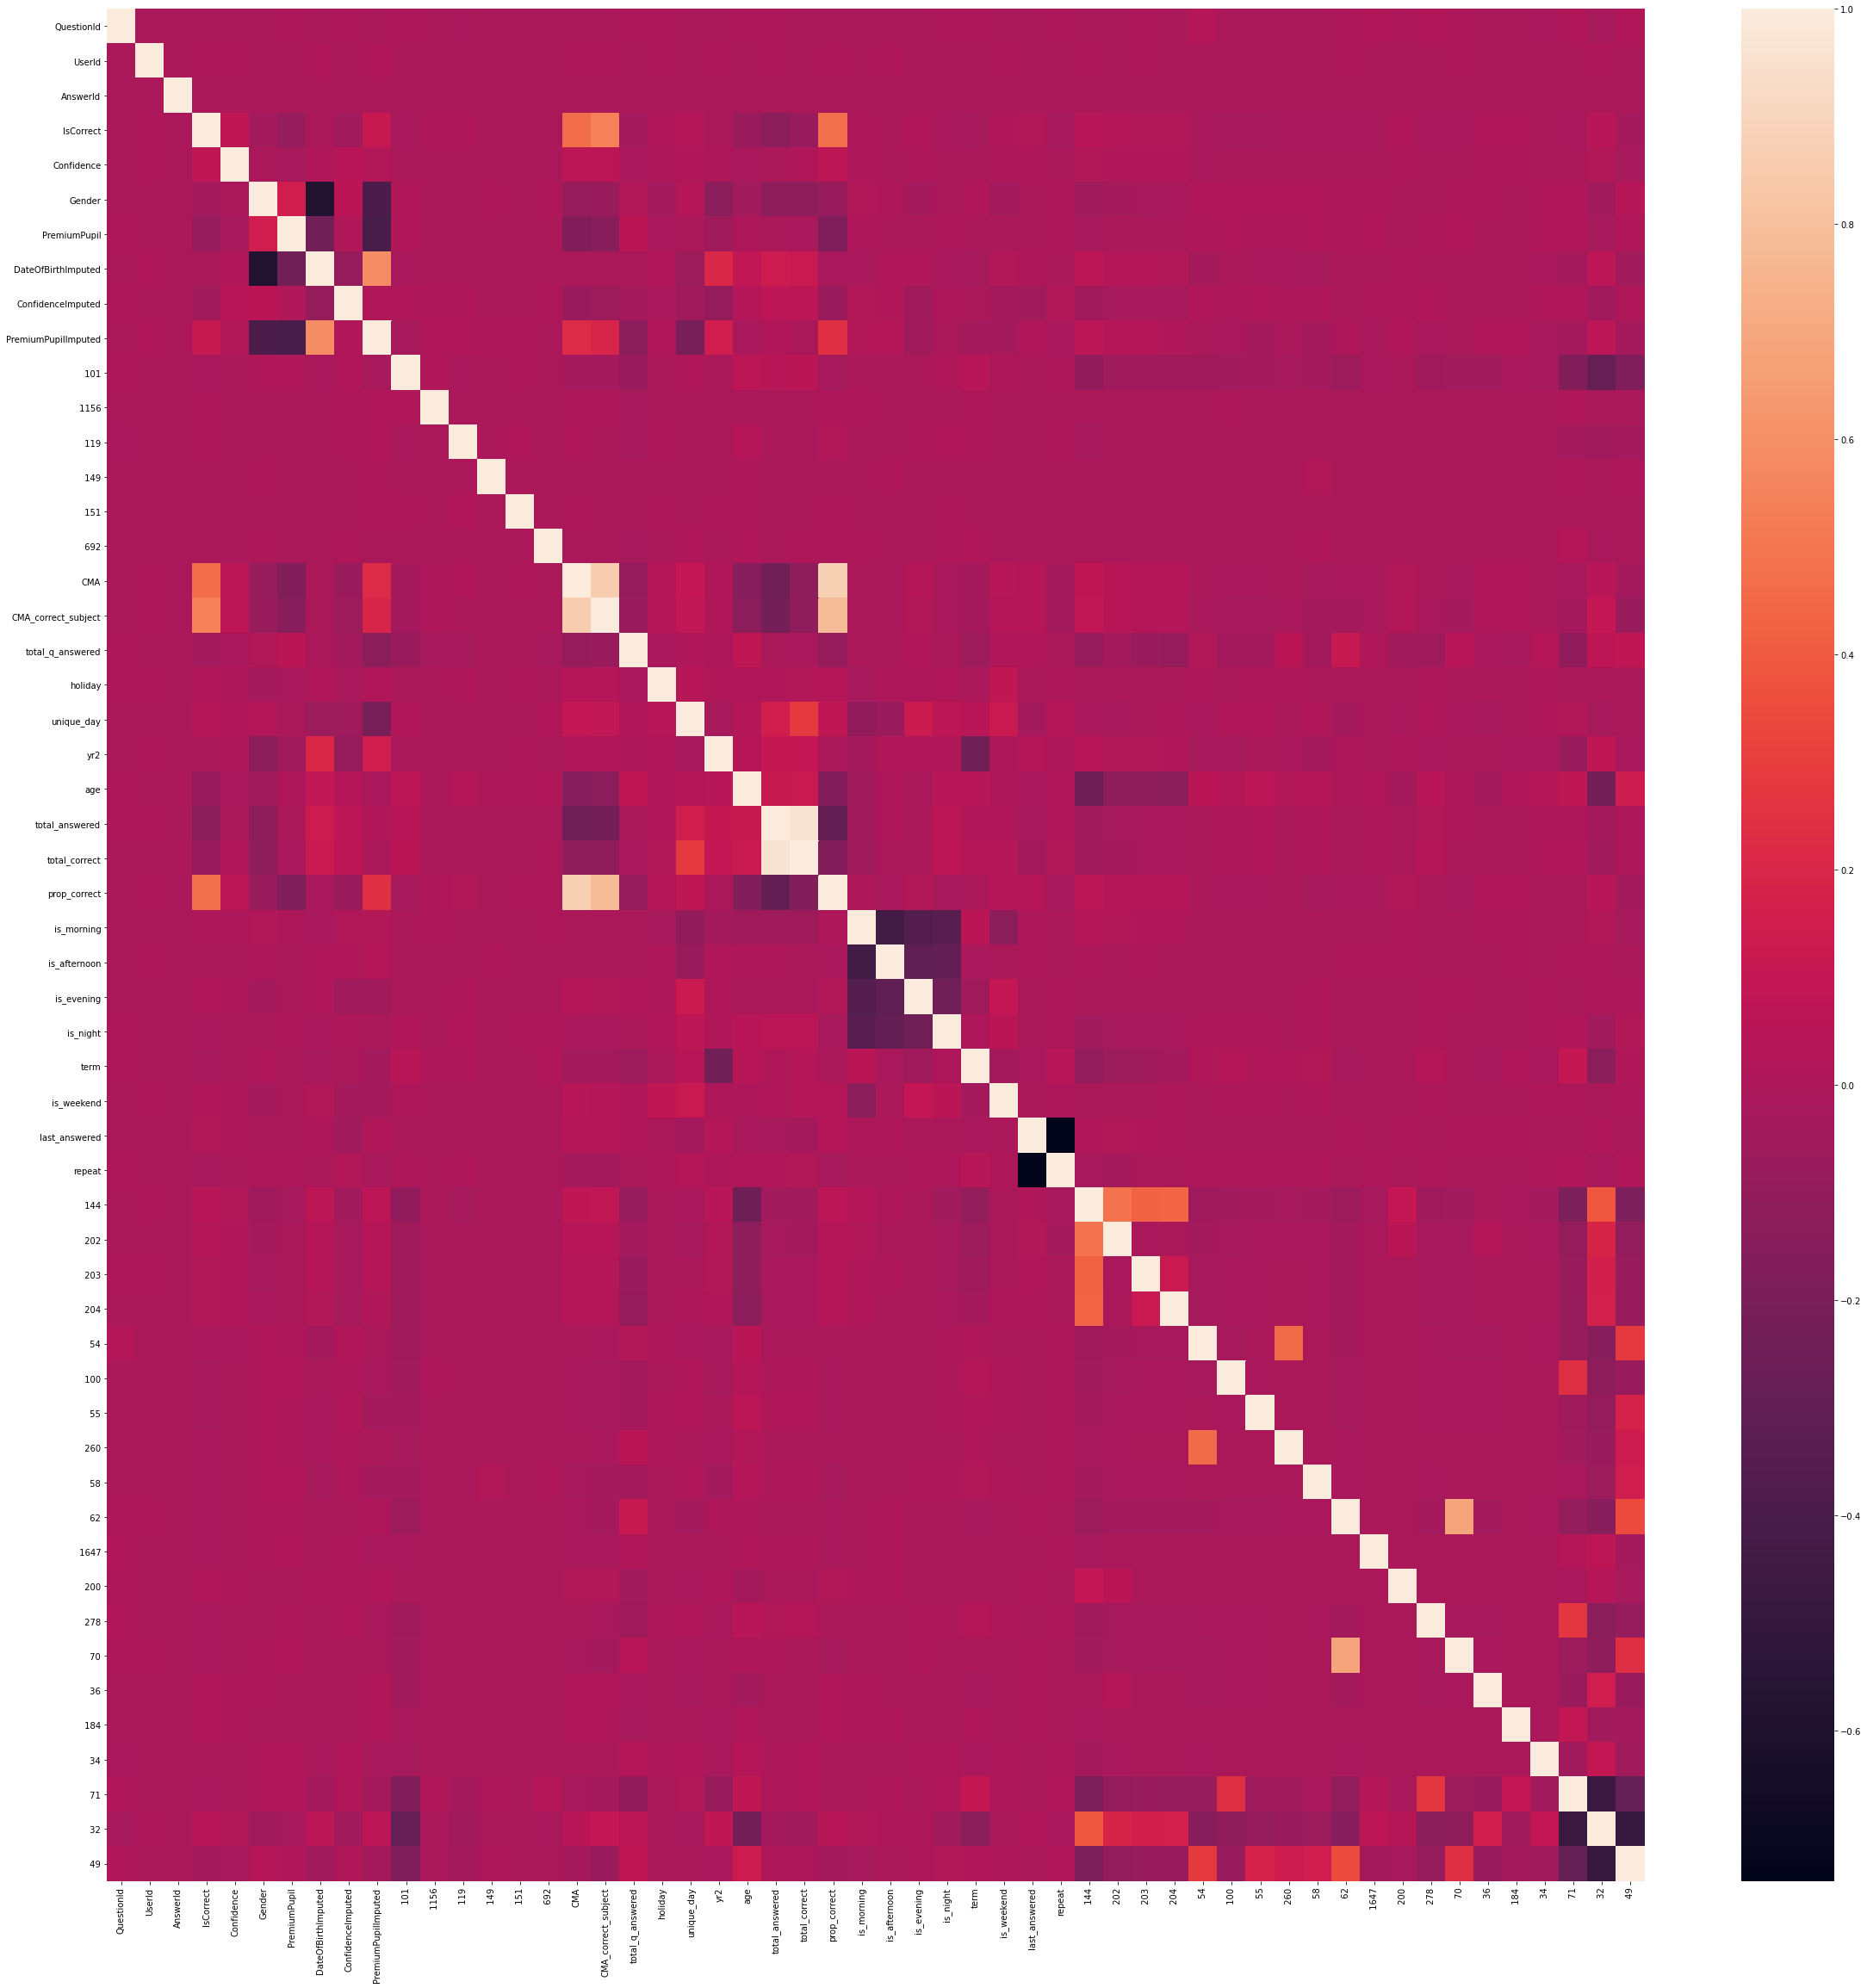

In [88]:
fig, ax = plt.subplots(figsize=(40,40))
ax = sns.heatmap(corr)

In [ ]:
train_set.shape()

Save the heatmap
Save train_set

In [ ]:
train_set.to_csv(r'C:\\Users\\kfps86\\Downloads\\train_set_vF.csv')
plt.savefig(r'C:\\Users\\kfps86\\Downloads\\train_set_vF_heatmap_v1.png')

# Feature Selection
Firstly look to see if any features are highly correlated,
if so remove the one which is least correlated to 'IsCorrect'

In [ ]:
# located highly correlated columns
# https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
cor_matrix = corr.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

In [ ]:
# remove the one which is least correlated to 'IsCorrect'

Feature Selection using Chi-Squared Test
chosen because data is categorical
https://towardsdatascience.com/categorical-feature-selection-via-chi-square-fc558b09de43


In [ ]:
categorical_columns = train_set.select_dtypes(exclude = 'number').drop('Loan_Status', axis = 1).columns
categorical_columns

In [ ]:
from scipy.stats import chi2_contingency


chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(loan['Loan_Status'], loan[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)
